<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Увеличение-и-уменьшение-выборок" data-toc-modified-id="Увеличение-и-уменьшение-выборок-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение и уменьшение выборок</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Признаки**
* `RowNumber` — индекс строки в данных
* `CustomerId` — уникальный идентификатор клиента
* `Surname` — фамилия
* `CreditScore` — кредитный рейтинг
* `Geography` — страна проживания
* `Gender` — пол
* `Age` — возраст
* `Tenure` — сколько лет человек является клиентом банка
* `Balance` — баланс на счёте
* `NumOfProducts` — количество продуктов банка, используемых клиентом
* `HasCrCard` — наличие кредитной карты
* `IsActiveMember` — активность клиента
* `EstimatedSalary` — предполагаемая зарплата

**Целевой признак**
* `Exited` — факт ухода клиента

## Подготовка данных

Импорт библиотек.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, r2_score
from sklearn.utils import shuffle
from matplotlib import pyplot

Вывод датасета.

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
display(df.sample(10))
df.info()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1762,1763,15815660,Mazzi,758,France,Female,34,1,154139.45,1,1,1,60728.89,0
968,969,15641009,Wilhelm,544,France,Male,37,3,84496.71,1,0,0,79972.09,0
5685,5686,15811565,Cocci,705,Spain,Female,47,3,63488.70,1,0,1,28640.92,1
4012,4013,15726814,Walton,554,Spain,Male,46,4,0.00,2,0,1,57320.92,0
8445,8446,15678333,Parry-Okeden,683,France,Female,26,7,0.00,2,1,0,86619.77,0
1597,1598,15656726,Ch'ien,771,France,Male,32,5,62321.62,1,1,1,40920.59,0
7037,7038,15789611,Lin,568,Germany,Male,46,8,150836.92,1,0,0,64516.80,1
8427,8428,15806771,Yefremova,753,France,Female,40,0,3768.69,2,1,0,177065.24,1
1919,1920,15739858,Otitodilichukwu,618,France,Male,56,7,0.00,1,1,1,142400.27,1
888,889,15702968,Artemieva,733,Germany,Male,74,3,106545.53,1,1,1,134589.58,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Пропусков в данных нет.

Удалим из датасета столбцы `RowNumber`, `CustomerId`, `Surname` так как они не несут в себе необходимой информации для прогнозирования.

In [3]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

В данных встречаются категориальные признаки, а именно страна проживания и пол клиента, преобразуем эти столбцы с помощью прямго кодирования.

In [4]:
df = pd.get_dummies(df, drop_first=True)
df.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
6231,631,48,1,106396.48,1,1,1,150661.42,1,1,0,1
8041,698,50,1,0.00,4,1,0,88566.90,1,0,1,0
8387,699,44,8,158697.61,1,1,0,107181.22,0,0,0,1
7533,630,51,0,108449.23,3,0,0,88372.69,1,1,0,0
2660,767,44,2,152509.25,1,1,1,136915.15,0,0,0,0


Масштабируем числовые признаки.

Преобразуем типы `NumOfProducts`, `HasCrCard`, `IsActiveMember`, `Exited` в `int8` для экономии места.

In [6]:
for column in ['NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']:
    df[column] = df[column].astype('int8')

Итог предобработки данных.

In [7]:
display(df.sample(10))
df.info()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
6413,739,20,4,133800.98,1,0,1,150245.81,0,0,0,0
8767,552,29,10,0.00,2,1,0,12186.83,0,0,0,1
2007,705,43,10,146547.78,1,0,1,10072.55,1,1,0,0
7279,486,37,1,101438.00,1,0,0,51364.56,0,1,0,1
3004,596,47,5,140187.10,2,1,1,174311.30,0,1,0,1
7219,581,54,4,89299.81,1,0,0,5558.47,1,0,0,1
4386,783,42,2,139707.28,1,1,0,2150.22,0,1,0,0
7560,512,51,6,144953.31,1,1,1,165035.17,0,0,0,1
9599,749,32,7,79523.13,1,0,1,157648.12,0,1,0,0
2432,537,39,3,135309.36,1,1,0,31728.86,1,1,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
CreditScore          10000 non-null int64
Age                  10000 non-null int64
Tenure               10000 non-null int64
Balance              10000 non-null float64
NumOfProducts        10000 non-null int8
HasCrCard            10000 non-null int8
IsActiveMember       10000 non-null int8
EstimatedSalary      10000 non-null float64
Exited               10000 non-null int8
Geography_Germany    10000 non-null uint8
Geography_Spain      10000 non-null uint8
Gender_Male          10000 non-null uint8
dtypes: float64(2), int64(3), int8(4), uint8(3)
memory usage: 459.1 KB


## Исследование задачи

Разделим данные на признаки и целевой признак.

In [8]:
features = df.drop('Exited', axis=1)
target = df['Exited']

Разделим получившиеся выборки на обучающую, валидационную и тестовую.

In [9]:
features_train, features_valid_test, target_train, target_valid_test = train_test_split(
    features, target, test_size=0.4, random_state=12345)

features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid_test, target_valid_test, test_size=0.5, random_state=12345)

print('Размеры наборов данных:')
print('Обучающий:    ', features_train.shape)
print('Валидационный:', features_valid.shape)
print('Тестовый:     ', features_test.shape)

Размеры наборов данных:
Обучающий:     (6000, 11)
Валидационный: (2000, 11)
Тестовый:      (2000, 11)


Масштабируем числовые признаки.

In [10]:
numeric = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

<div style=" border:solid Blue 1px; padding: 5px; border-radius: 5px;"> <b>Комментарий студента:</b> <br> 
    Масштабирование
</div>

Обучим разные модели.

### Дерево решений

In [11]:
def decision_tree(features_tr, target_tr, features_val, target_val, cw=None):
    best_depth = 0
    best_f1 = 0
    best_roc_auc = 0

    for depth in range(2, 31):
    
        model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight=cw)
        model.fit(features_tr, target_tr)
    
        predictions_valid = model.predict(features_val)
        f1 = f1_score(target_val, predictions_valid)
        
        predictions =model.predict_proba(features_val)[:,1]
        roc_auc = roc_auc_score(target_val, predictions)
    
        if f1 > best_f1:
            best_depth = depth
            best_f1 = f1    
            best_roc_auc = roc_auc

    print("Глубина дерева:", best_depth)
    print("f1-мера:       ", best_f1)
    print("roc_auc:       ", best_roc_auc)
    
decision_tree(features_train, target_train, features_valid, target_valid)

Глубина дерева: 9
f1-мера:        0.5722543352601155
roc_auc:        0.7832470859368857


**Вывод:**
* Наиулучшие значния roc_auc и f1 при глубине дерева 9. 
* f1 = 0.57, среднее качество модели.
* roc_auc > 0.5, модель можно считать адекватной. 

### Случайный лес

In [12]:
def random_forest(features_tr, target_tr, features_val, target_val, cw=None):
    best_est = 0
    best_depth = 0
    best_f1 = 0
    best_roc_auc = 0

    for est in range(2, 21):
        for depth in range(2, 21):
        
            model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight=cw)
    
            model.fit(features_tr, target_tr)
    
            predictions_valid = model.predict(features_val)
            f1 = f1_score(target_val, predictions_valid)
            
            predictions =model.predict_proba(features_val)[:,1]
            roc_auc = roc_auc_score(target_val, predictions)
        
            if f1 > best_f1:
                best_est = est
                best_depth = depth
                best_f1 = f1    
                best_roc_auc = roc_auc     
    
    print("Кол-во деревьев:", best_est)
    print("Глубина дерева: ", best_depth)
    print("f1-мера:        ", best_f1)
    print("roc_auc:        ", best_roc_auc)

random_forest(features_train, target_train, features_valid, target_valid)

Кол-во деревьев: 11
Глубина дерева:  16
f1-мера:         0.6041958041958042
roc_auc:         0.8328776486671223


**Вывод:**
* Наиулучшие значния roc_auc и f1 при кол-ве деревьев 11 и глубине дерева 16. 
* f1 = 0.6, среднее качество модели.
* roc_auc > 0.5, модель можно считать адекватной. 

### Логистическая регрессия

In [13]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
    
predictions_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predictions_valid)

predictions =model.predict_proba(features_valid)[:,1]
roc_auc = roc_auc_score(target_valid, predictions)

print("f1-мера:", f1)
print("roc_auc:", roc_auc)  

f1-мера: 0.3316412859560068
roc_auc: 0.7584503293632311


**Вывод:**
* f1 = 0.33, плохое качество модели.
* roc_auc = 0.76, модель можно считать адекватной. 

### Вывод

Лучше всего показала себя модель случайного леса, так же неплохой результат показало дерево решений. Логистическая регрессия выдала низкое начение f1-меры. 

В дальшейших пунктах будем рассматривать только дерево решений и случайный лес.

## Борьба с дисбалансом

Для борьбы с дисбалансом классов будем использовать:
* взвешивание классов;
* увеличение выборки положительного класса;
* уменьшение выборки отрицательного класса;
* перемешивание объектов методом shuffle.

### Взвешивание классов

Дерево решений.

In [14]:
decision_tree(features_train, target_train, features_valid, target_valid, cw='balanced')

Глубина дерева: 5
f1-мера:        0.5963791267305644
roc_auc:        0.8310244134068074


Случайный лес.

In [15]:
random_forest(features_train, target_train, features_valid, target_valid, cw='balanced')

Кол-во деревьев: 20
Глубина дерева:  7
f1-мера:         0.623773173391494
roc_auc:         0.8522250920946777


Положительная тенденция результатов f1 и roc_auc есть, но не значительная. Все критерии увеличились примерно на 0.02

### Увеличение и уменьшение выборок

Напишем функции увеличения и уменьшения выборок.

In [16]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled


def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

Будем рассматривать различные значения увеличения и уменьшения выборок.

**Дерево решений**

In [17]:
for rep in range(2,4):
    for frac in np.arange(0.5, 0.9, 0.05):
        print('=============================================================')
        print('repeat = {};   fraction = {}'.format(rep, round(frac,2)))
        X_train_upsampled, y_train_upsampled = upsample(features_train, target_train, rep)
        features_downsampled, target_downsampled = downsample(X_train_upsampled, y_train_upsampled, frac)
        
        best_depth = 0
        best_f1 = 0
        best_roc_auc = 0

        for depth in range(2, 31):
    
            model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
            model.fit(features_downsampled , target_downsampled)
    
            predictions_valid = model.predict(features_valid)
            f1 = f1_score(target_valid, predictions_valid)
            
            predictions =model.predict_proba(features_valid)[:,1]
            roc_auc = roc_auc_score(target_valid, predictions)
    
            if f1 > best_f1:
                best_depth = depth
                best_f1 = f1    
                best_roc_auc = roc_auc

        print("Глубина дерева:", best_depth)
        print("f1-мера:       ", best_f1)
        print("roc_auc:       ", best_roc_auc)

repeat = 2;   fraction = 0.5
Глубина дерева: 6
f1-мера:        0.5845864661654135
roc_auc:        0.8261089167004398
repeat = 2;   fraction = 0.55
Глубина дерева: 6
f1-мера:        0.5919661733615222
roc_auc:        0.8118561689823915
repeat = 2;   fraction = 0.6
Глубина дерева: 5
f1-мера:        0.5920398009950248
roc_auc:        0.820865266545285
repeat = 2;   fraction = 0.65
Глубина дерева: 5
f1-мера:        0.589711417816813
roc_auc:        0.8287258270374246
repeat = 2;   fraction = 0.7
Глубина дерева: 5
f1-мера:        0.589711417816813
roc_auc:        0.8306319902733503
repeat = 2;   fraction = 0.75
Глубина дерева: 7
f1-мера:        0.5897142857142856
roc_auc:        0.8168896194629776
repeat = 2;   fraction = 0.8
Глубина дерева: 5
f1-мера:        0.5895806861499364
roc_auc:        0.8175360968793663
repeat = 2;   fraction = 0.85
Глубина дерева: 5
f1-мера:        0.590738423028786
roc_auc:        0.8226307925888736
repeat = 3;   fraction = 0.5
Глубина дерева: 6
f1-мера:        0

Наилучший результат для дерева решений:
* увеличение положительного класса в 3 раза 
* сэмплирование отрицательного класса с коэффициентом 0.8
* глубина дерева 5
* f1-мера = 0.596
* roc_auc = 0.807

**Случайный лес**

In [18]:
for rep in range(2,4):
    for frac in np.arange(0.5, 0.8, 0.05):
        print('=============================================================')
        print('repeat = {};   fraction = {}'.format(rep, round(frac,2)))
        X_train_upsampled, y_train_upsampled = upsample(features_train, target_train, rep)
        features_downsampled, target_downsampled = downsample(X_train_upsampled, y_train_upsampled, frac)
        
        best_est = 0
        best_depth = 0
        best_f1 = 0
        best_roc_auc = 0

        for est in range(2, 21):
            for depth in range(2, 21):
        
                model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
    
                model.fit(features_downsampled , target_downsampled)
    
                predictions_valid = model.predict(features_valid)
                f1 = f1_score(target_valid, predictions_valid)
                
                predictions =model.predict_proba(features_valid)[:,1]
                roc_auc = roc_auc_score(target_valid, predictions)
        
                if f1 > best_f1:
                    best_est = est
                    best_depth = depth
                    best_f1 = f1    
                    best_roc_auc = roc_auc     
    
        print("Кол-во деревьев:", best_est)
        print("Глубина дерева: ", best_depth)
        print("f1-мера:        ", best_f1)
        print("roc_auc:        ", best_roc_auc)

repeat = 2;   fraction = 0.5
Кол-во деревьев: 13
Глубина дерева:  8
f1-мера:         0.6213197969543147
roc_auc:         0.8465973360593761
repeat = 2;   fraction = 0.55
Кол-во деревьев: 10
Глубина дерева:  6
f1-мера:         0.6286307053941909
roc_auc:         0.8510561399476164
repeat = 2;   fraction = 0.6
Кол-во деревьев: 18
Глубина дерева:  5
f1-мера:         0.6302895322939868
roc_auc:         0.8461882784192984
repeat = 2;   fraction = 0.65
Кол-во деревьев: 20
Глубина дерева:  7
f1-мера:         0.6461187214611873
roc_auc:         0.8524662924406752
repeat = 2;   fraction = 0.7
Кол-во деревьев: 11
Глубина дерева:  10
f1-мера:         0.6338672768878718
roc_auc:         0.8425906883056393
repeat = 2;   fraction = 0.75
Кол-во деревьев: 15
Глубина дерева:  9
f1-мера:         0.6356033452807647
roc_auc:         0.8456484130680684
repeat = 2;   fraction = 0.8
Кол-во деревьев: 12
Глубина дерева:  8
f1-мера:         0.6377858002406739
roc_auc:         0.8489488504043697
repeat = 3;   fr

Наилучший результат для случайного леса:
* увеличение положительного класса в 2 раза 
* сэмплирование отрицательного класса с коэффициентом 0.65
* количество деревьев 20
* глубина дерева 7
* f1-мера = 0.646 
* roc_auc = 0.852.

## Тестирование модели

Протестируем модели дерева решений и случайного леса.

Для начала объединим тренировочную и валидационную выборки для повторного обучения модели.

In [19]:
features = pd.concat([features_train, features_valid], ignore_index=True)
target = pd.concat([target_train, target_valid], ignore_index=True)

**Тест дерева решений**

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.58 µs
 f1 = 0.5953, 
 roc_auc = 0.8444

Feature: 0, Score: 0.01228
Feature: 1, Score: 0.44632
Feature: 2, Score: 0.00083
Feature: 3, Score: 0.11079
Feature: 4, Score: 0.30075
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.08137
Feature: 7, Score: 0.00526
Feature: 8, Score: 0.03806
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00435


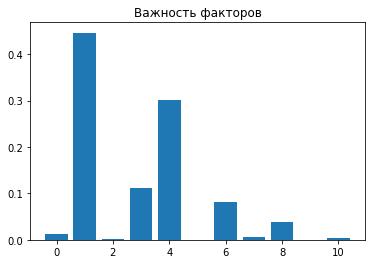

1 CreditScore
2 Age
3 Tenure
4 Balance
5 NumOfProducts
6 HasCrCard
7 IsActiveMember
8 EstimatedSalary
9 Geography_Germany
10 Geography_Spain
11 Gender_Male


In [20]:
%time

features_upsampled, target_upsampled = upsample(features, target, 3)
features_balanced, target_balanced = downsample(features_upsampled, target_upsampled, 0.8)
model = DecisionTreeClassifier(random_state=123, max_depth=6)

model.fit(features_balanced, target_balanced)
predictions = model.predict(features_test)

f1 = f1_score(target_test, predictions)

predictions =model.predict_proba(features_test)[:,1]
roc_auc = roc_auc_score(target_test, predictions)

print(' f1 = {}, \n roc_auc = {}'.format(round(f1,4), round(roc_auc,4)))
print('')

importance = model.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

pyplot.bar([x for x in range(len(importance))], importance)
plt.title('Важность факторов')
pyplot.show()

n=1
for i in features_balanced.columns:
    print(n, i)
    n+= 1

**Тест случайного леса**

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs
 f1 = 0.6128, 
 roc_auc = 0.8543

Feature: 0, Score: 0.03132
Feature: 1, Score: 0.39061
Feature: 2, Score: 0.01865
Feature: 3, Score: 0.07367
Feature: 4, Score: 0.26885
Feature: 5, Score: 0.00284
Feature: 6, Score: 0.08586
Feature: 7, Score: 0.03462
Feature: 8, Score: 0.06029
Feature: 9, Score: 0.00471
Feature: 10, Score: 0.02858


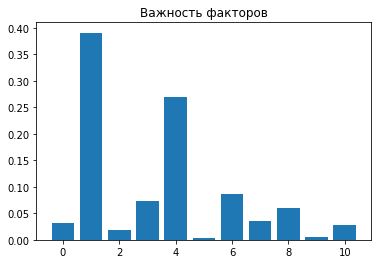

1 CreditScore
2 Age
3 Tenure
4 Balance
5 NumOfProducts
6 HasCrCard
7 IsActiveMember
8 EstimatedSalary
9 Geography_Germany
10 Geography_Spain
11 Gender_Male


In [22]:
%time

features_upsampled, target_upsampled = upsample(features, target, 2)
features_balanced, target_balanced = downsample(features_upsampled, target_upsampled, 0.65)

model = RandomForestClassifier(random_state=123, n_estimators=20,max_depth=7)

model.fit(features_balanced, target_balanced)
predictions = model.predict(features_test)

f1 = f1_score(target_test, predictions)

predictions = model.predict_proba(features_test)[:,1]
roc_auc = roc_auc_score(target_test, predictions)

print(' f1 = {}, \n roc_auc = {}'.format(round(f1,4), round(roc_auc,4)))
print('')

importance = model.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

pyplot.bar([x for x in range(len(importance))], importance)
plt.title('Важность факторов')
pyplot.show()

n=1
for i in features_balanced.columns:
    print(n, i)
    n+= 1

### Вывод

Обе модели показали хороший результат на тестовой выборке, f1-мера больше 0.59 у двух моделей, что соответствует тз. auc_roc > 0.5, модели адекватны.